In [1]:
import os
import time
import matplotlib.pyplot as plt
import random
import numpy as np
import tensorflow as tf

if(tf.__version__.split('.')[0]=='2'):
    import tensorflow.compat.v1 as tf
    tf.disable_v2_behavior()    

# Load MNIST dataset
import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

sess = tf.InteractiveSession()

Instructions for updating:
non-resource variables are not supported in the long term
Instructions for updating:
Please use alternatives such as: tensorflow_datasets.load('mnist')
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/_DataSet.py from tensorflow/models.


In [2]:
def weight_variable(shape):
    '''
    Initialize weights
    :param shape: shape of weights, e.g. [w, h ,Cin, Cout] where
    w: width of the filters
    h: height of the filters
    Cin: the number of the channels of the filters
    Cout: the number of filters
    :return: a tensor variable for weights with initial values
    '''
    
    initial = tf.initializers.glorot_uniform()
    W = tf.Variable(initial(shape=shape))
    return W

def bias_variable(shape):
    '''
    Initialize biases
    :param shape: shape of biases, e.g. [Cout] where
    Cout: the number of filters
    :return: a tensor variable for biases with initial values
    '''

    initial = tf.constant(0.1, shape = shape)
    b = tf.Variable(initial)
    return b

def conv2d(x, W):
    '''
    Perform 2-D convolution
    :param x: input tensor of size [N, W, H, Cin] where
    N: the number of images
    W: width of images
    H: height of images
    Cin: the number of channels of images
    :param W: weight tensor [w, h, Cin, Cout]
    w: width of the filters
    h: height of the filters
    Cin: the number of the channels of the filters = the number of channels of images
    Cout: the number of filters
    :return: a tensor of features extracted by the filters, a.k.a. the results after convolution
    '''

    h_conv = tf.nn.conv2d(x, W, strides = [1, 1, 1, 1], padding = 'SAME')

    return h_conv

def max_pool_2x2(x):
    '''
    Perform non-overlapping 2-D maxpooling on 2x2 regions in the input data
    :param x: input data
    :return: the results of maxpooling (max-marginalized + downsampling)
    '''
    h_max = tf.nn.max_pool(x, ksize = [1, 2, 2, 1],
                             strides = [1, 2, 2, 1],
                             padding = 'SAME')
    return h_max


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use `tf.global_variables_initializer` instead.
step 0, training accuracy 0.03999999910593033, validation accuracy 0.11760000139474869, test accuracy 0.11330000311136246
training loss 2.31404447555542, validation loss 2.311246395111084, test loss 2.3134076595306396
step 100, training accuracy 0.3400000035762787, validation accuracy 0.3197999894618988, test accuracy 0.31060001254081726
training loss 2.173764705657959, validation loss 2.17791485786438, test loss 2.1773200035095215
step 200, training accuracy 0.6399999856948853, validation accuracy 0.6618000268936157, test accuracy 0.6779999732971191
training loss 1.8910771608352661, validation loss 1.8502912521362305, test loss 1.8458812236785889
step 300, training accuracy 0.699999988079071, validation accuracy 0.7778000235557556, test accuracy 0.7886999845504761
training loss 1.1890692710876465, v

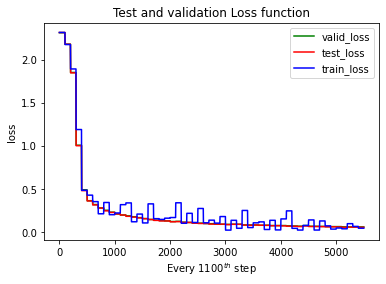

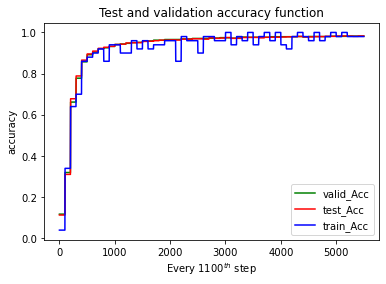

test accuracy 0.9822
The training takes 676.062250 second to finish


In [3]:
def main():
    # Specify training parameters
    result_dir = './results/' # directory where the results from the training are saved
    max_step = 5500 # the maximum iterations. After max_step iterations, the training will stop no matter what

    start_time = time.time() # start timing

    # FILL IN THE CODE BELOW TO BUILD YOUR NETWORK

    # placeholders for input data and input labeles
    x  = tf.placeholder(tf.float32, [None, 784], name='x')
    y_ = tf.placeholder(tf.float32, [None, 10],  name='y_')

    # reshape the input image
    x_image = tf.reshape(x, [-1, 28, 28, 1])

    # first convolutional layer
    W_conv1 = weight_variable([5, 5, 1, 32])
    b_conv1 = bias_variable([32])
    h_conv1 = tf.nn.leaky_relu(conv2d(x_image, W_conv1) + b_conv1)
    h_pool1 = max_pool_2x2(h_conv1)

    # second convolutional layer
    W_conv2 = weight_variable([5, 5, 32, 64])
    b_conv2 = bias_variable([64])
    h_conv2 = tf.nn.leaky_relu(conv2d(h_pool1, W_conv2) + b_conv2)
    h_pool2 = max_pool_2x2(h_conv2)

    # densely connected layer
    W_fc1 = weight_variable([7 * 7 * 64, 1024])
    b_fc1 = bias_variable([1024])
    h_pool2_flat = tf.reshape(h_pool2, [-1, 7 * 7 * 64])
    h_fc1 = tf.nn.leaky_relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

    # dropout
    keep_prob = tf.placeholder(tf.float32)
    h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

    # softmax
    W_fc2 = weight_variable([1024, 10])
    b_fc2 = bias_variable([10])
    y_conv = tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2, name = 'y')

    # FILL IN THE FOLLOWING CODE TO SET UP THE TRAINING

    # setup training
    cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y_conv), 
                                                     reduction_indices = [1]))
    train_step = tf.train.MomentumOptimizer(1e-4, 0.99).minimize(cross_entropy)
    correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32), name = 'accuracy') 
                        
    # Add a scalar summary for the snapshot loss for training.
    tf.summary.scalar(cross_entropy.op.name, cross_entropy)
    #Add a scalar summary for the snapshot accuracy for training:
    tf.summary.scalar(accuracy.op.name, accuracy)
    tf.summary.scalar('valid_loss/Validation', cross_entropy)
    tf.summary.scalar('test_loss/test', cross_entropy)

    #Add a scalar summary for the snapshot max, min, mean standard deviation, histogram of weights, bias
    #and after activation function and max-pooling
    with tf.name_scope('Layer1/Conv1'):
      with tf.name_scope('Weights'):
        max = tf.reduce_max(W_conv1)
        min = tf.reduce_min(W_conv1)
        mean = tf.reduce_mean(W_conv1)
        stddev = tf.sqrt(tf.reduce_mean(tf.square(W_conv1 - mean)))
        tf.summary.scalar('W_conv1_min', min)
        tf.summary.scalar('W_conv1_max', max)
        tf.summary.scalar('W_conv1_mean', mean)
        tf.summary.scalar('W_conv1_std', stddev)
        tf.summary.histogram('W_conv1_hist', W_conv1)

    with tf.name_scope('Layer1/Conv1'):
      with tf.name_scope('Biases'):
        max = tf.reduce_max(b_conv1)
        min = tf.reduce_min(b_conv1)
        mean = tf.reduce_mean(b_conv1)
        stddev = tf.sqrt(tf.reduce_mean(tf.square(b_conv1 - mean)))
        tf.summary.scalar('b_conv1_min', min)
        tf.summary.scalar('b_conv1_max', max)
        tf.summary.scalar('b_conv1_mean', mean)
        tf.summary.scalar('b_conv1_std', stddev)
        tf.summary.histogram('b_conv1_hist', b_conv1)

    with tf.name_scope('Layer1/Conv1'):
      with tf.name_scope('Activation_after_leaky_relu'):
        max = tf.reduce_max(h_conv1)
        min = tf.reduce_min(h_conv1)
        mean = tf.reduce_mean(h_conv1)
        stddev = tf.sqrt(tf.reduce_mean(tf.square(h_conv1 - mean)))
        tf.summary.scalar('h_conv1_min', min)
        tf.summary.scalar('h_conv1_max', max)
        tf.summary.scalar('h_conv1_mean', mean)
        tf.summary.scalar('h_conv1_std', stddev)
        tf.summary.histogram('h_conv1_hist', h_conv1)

    with tf.name_scope('Layer1/Conv1'):
      with tf.name_scope('AfterMaxPooling'):
        max = tf.reduce_max(h_pool1)
        min = tf.reduce_min(h_pool1)
        mean = tf.reduce_mean(h_pool1)
        stddev = tf.sqrt(tf.reduce_mean(tf.square(h_pool1 - mean)))
        tf.summary.scalar('h_pool1_min', min)
        tf.summary.scalar('h_pool1_max', max)
        tf.summary.scalar('h_pool1_mean', mean)
        tf.summary.scalar('h_pool1_std', stddev)
        tf.summary.histogram('h_pool1_hist', h_pool1)


    with tf.name_scope('Layer2/Conv2'):
      with tf.name_scope('Weights'):
        max = tf.reduce_max(W_conv2)
        min = tf.reduce_min(W_conv2)
        mean = tf.reduce_mean(W_conv2)
        stddev = tf.sqrt(tf.reduce_mean(tf.square(W_conv2 - mean)))
        tf.summary.scalar('W_conv2_min', min)
        tf.summary.scalar('W_conv2_max', max)
        tf.summary.scalar('W_conv2_mean', mean)
        tf.summary.scalar('W_conv2_std', stddev)
        tf.summary.histogram('W_conv2_hist', W_conv2)

    with tf.name_scope('Layer2/Conv2'):
      with tf.name_scope('Biases'):
        max = tf.reduce_max(b_conv2)
        min = tf.reduce_min(b_conv2)
        mean = tf.reduce_mean(b_conv2)
        stddev = tf.sqrt(tf.reduce_mean(tf.square(b_conv2 - mean)))
        tf.summary.scalar('b_conv2_min', min)
        tf.summary.scalar('b_conv2_max', max)
        tf.summary.scalar('b_conv2_mean', mean)
        tf.summary.scalar('b_conv2_std', stddev)
        tf.summary.histogram('b_conv2_hist', b_conv2)

    with tf.name_scope('Layer2/Conv2'):
      with tf.name_scope('Activation_after_leaky_relu'):
        max = tf.reduce_max(h_conv2)
        min = tf.reduce_min(h_conv2)
        mean = tf.reduce_mean(h_conv2)
        stddev = tf.sqrt(tf.reduce_mean(tf.square(h_conv2 - mean)))
        tf.summary.scalar('h_conv2_min', min)
        tf.summary.scalar('h_conv2_max', max)
        tf.summary.scalar('h_conv2_mean', mean)
        tf.summary.scalar('h_conv2_std', stddev)
        tf.summary.histogram('h_conv2_hist', h_conv2)

    with tf.name_scope('Layer2/Conv2'):
      with tf.name_scope('AfterMaxPooling'):
        max = tf.reduce_max(h_pool2)
        min = tf.reduce_min(h_pool2)
        mean = tf.reduce_mean(h_pool2)
        stddev = tf.sqrt(tf.reduce_mean(tf.square(h_pool2 - mean)))
        tf.summary.scalar('h_pool2_min', min)
        tf.summary.scalar('h_pool2_max', max)
        tf.summary.scalar('h_pool2_mean', mean)
        tf.summary.scalar('h_pool2_std', stddev)
        tf.summary.histogram('h_pool2_hist', h_pool2)

    with tf.name_scope('DenseLayer1'):
      with tf.name_scope('Weights'):
        max = tf.reduce_max(W_fc1)
        min = tf.reduce_min(W_fc1)
        mean = tf.reduce_mean(W_fc1)
        stddev = tf.sqrt(tf.reduce_mean(tf.square(W_fc1 - mean)))
        tf.summary.scalar('W_fc1_min', min)
        tf.summary.scalar('W_fc1_max', max)
        tf.summary.scalar('W_fc1_mean', mean)
        tf.summary.scalar('W_fc1_std', stddev)
        tf.summary.histogram('W_fc1_hist', W_fc1)

    with tf.name_scope('DenseLayer1'):
      with tf.name_scope('Biases'):
        max = tf.reduce_max(b_fc1)
        min = tf.reduce_min(b_fc1)
        mean = tf.reduce_mean(b_fc1)
        stddev = tf.sqrt(tf.reduce_mean(tf.square(b_fc1 - mean)))
        tf.summary.scalar('b_fc1_min', min)
        tf.summary.scalar('b_fc1_max', max)
        tf.summary.scalar('b_fc1_mean', mean)
        tf.summary.scalar('b_fc1_std', stddev)
        tf.summary.histogram('b_fc1', b_fc1)


    with tf.name_scope('DenseLayer1'):
      with tf.name_scope('h_pool2_flat'):
        max = tf.reduce_max(h_pool2_flat)
        min = tf.reduce_min(h_pool2_flat)
        mean = tf.reduce_mean(h_pool2_flat)
        stddev = tf.sqrt(tf.reduce_mean(tf.square(h_pool2_flat - mean)))
        tf.summary.scalar('h_pool2_flat_min', min)
        tf.summary.scalar('h_pool2_flat_max', max)
        tf.summary.scalar('h_pool2_flat_mean', mean)
        tf.summary.scalar('h_pool2_flat_std', stddev)
        tf.summary.histogram('h_pool2_flat', h_pool2_flat)
    
    with tf.name_scope('DenseLayer1'):
      with tf.name_scope('h_pool2_flat'):
        max = tf.reduce_max(h_fc1)
        min = tf.reduce_min(h_fc1)
        mean = tf.reduce_mean(h_fc1)
        stddev = tf.sqrt(tf.reduce_mean(tf.square(h_fc1 - mean)))
        tf.summary.scalar('h_fc1_min', min)
        tf.summary.scalar('h_fc1_max', max)
        tf.summary.scalar('h_fc1_mean', mean)
        tf.summary.scalar('h_fc1_std', stddev)
        tf.summary.histogram('h_fc1_flat', h_fc1)

    with tf.name_scope('DropoutLayer'):    
      max = tf.reduce_max(h_fc1_drop)
      min = tf.reduce_min(h_fc1_drop)
      mean = tf.reduce_mean(h_fc1_drop)
      stddev = tf.sqrt(tf.reduce_mean(tf.square(h_fc1_drop - mean)))
      tf.summary.scalar('h_fc1_drop_min', min)
      tf.summary.scalar('h_fc1_drop_max', max)
      tf.summary.scalar('h_fc1_drop_mean', mean)
      tf.summary.scalar('h_fc1_drop_std', stddev)
      tf.summary.histogram('h_fc1_drop_hist', h_fc1_drop)

    with tf.name_scope('OutputLayer'):
      with tf.name_scope('Weights'):
        max = tf.reduce_max(W_fc2)
        min = tf.reduce_min(W_fc2)
        mean = tf.reduce_mean(W_fc2)
        stddev = tf.sqrt(tf.reduce_mean(tf.square(W_fc2 - mean)))
        tf.summary.scalar('W_fc2_min', min)
        tf.summary.scalar('W_fc2_max', max)
        tf.summary.scalar('W_fc2_mean', mean)
        tf.summary.scalar('W_fc2_std', stddev)
        tf.summary.histogram('W_fc2_hist', W_fc2)

    with tf.name_scope('OutputLayer'):
      with tf.name_scope('Biases'):
        max = tf.reduce_max(b_fc2)
        min = tf.reduce_min(b_fc2)
        mean = tf.reduce_mean(b_fc2)
        stddev = tf.sqrt(tf.reduce_mean(tf.square(b_fc2 - mean)))
        tf.summary.scalar('b_fc2_min', min)
        tf.summary.scalar('b_fc2_max', max)
        tf.summary.scalar('b_fc2_mean', mean)
        tf.summary.scalar('b_fc2_std', stddev)
        tf.summary.histogram('b_fc2', b_fc2)

    with tf.name_scope('OutputLayer'):
      with tf.name_scope('Biases'):
        max = tf.reduce_max(b_fc2)
        min = tf.reduce_min(b_fc2)
        mean = tf.reduce_mean(b_fc2)
        stddev = tf.sqrt(tf.reduce_mean(tf.square(b_fc2 - mean)))
        tf.summary.scalar('b_fc2_min', min)
        tf.summary.scalar('b_fc2_max', max)
        tf.summary.scalar('b_fc2_mean', mean)
        tf.summary.scalar('b_fc2_std', stddev)
        tf.summary.histogram('b_fc2', b_fc2)

    with tf.name_scope('OutputLayer'):
      with tf.name_scope('output'):
        max = tf.reduce_max(y_conv)
        min = tf.reduce_min(y_conv)
        mean = tf.reduce_mean(y_conv)
        stddev = tf.sqrt(tf.reduce_mean(tf.square(y_conv - mean)))
        tf.summary.scalar('y_conv_min', min)
        tf.summary.scalar('y_conv_max', max)
        tf.summary.scalar('y_conv_mean', mean)
        tf.summary.scalar('y_conv_std', stddev)
        tf.summary.histogram('y_conv', y_conv)

    
    # Build the summary operation based on the TF collection of Summaries.
    summary_op = tf.summary.merge_all()

    # Add the variable initializer Op.
    init = tf.initialize_all_variables()

    # Create a saver for writing training checkpoints.
    saver = tf.train.Saver()

    # Instantiate a SummaryWriter to output summaries and the Graph.
    summary_writer = tf.summary.FileWriter(result_dir, sess.graph)

    # Run the Op to initialize the variables.
    sess.run(init)

    trainLoss = []
    validationLoss = []
    testLoss = []
    trainAcc = []
    validationAcc = []
    testAcc = []
    steps = []
    # run the training
    for i in range(max_step):
        batch = mnist.train.next_batch(50) # make the data batch, which is used in the training iteration.
                                            # the batch size is 50
        if i%100 == 0:
            # output the training accuracy every 100 iterations
            train_accuracy = accuracy.eval(feed_dict = {
                x: batch[0], y_:batch[1], keep_prob: 1.0})
            train_loss = cross_entropy.eval(feed_dict = {
                x: batch[0], y_:batch[1], keep_prob: 1.0})
            #output the test accuracy every 100 iterations
            test_accuracy = accuracy.eval(feed_dict = {
                x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0})
            #output the test loss every 100 iterations
            test_loss = cross_entropy.eval(feed_dict = {
                x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0})
            #output the validation accuracy every 100 iterations
            valid_accuracy = accuracy.eval(feed_dict = {
                x: mnist.validation.images, y_: mnist.validation.labels, keep_prob: 1.0})
            #output the validation loss every 100 iterations
            valid_loss = cross_entropy.eval(feed_dict = {
                x: mnist.validation.images, y_: mnist.validation.labels, keep_prob: 1.0})
            
            print("step {}, training accuracy {}, validation accuracy {}, test accuracy {}".format(i, train_accuracy, valid_accuracy, test_accuracy))
            print("training loss {}, validation loss {}, test loss {}".format(train_loss, valid_loss, test_loss))
            
            
            # Update the events file which is used to monitor the training (in this case,
            # only the training loss is monitored)
            summary_str = sess.run(summary_op, feed_dict={x: batch[0], y_: batch[1], 
                                                          keep_prob: 0.5})           
            summary_writer.add_summary(summary_str, i)
            summary_writer.flush()   

        # save the checkpoints every 1100 iterations
        if i % 1100 == 0 or i == max_step:
            checkpoint_file = os.path.join(result_dir, 'checkpoint')
            saver.save(sess, checkpoint_file, global_step=i)
        validationLoss.append(valid_loss)
        testLoss.append(test_loss)
        trainLoss.append(train_loss)
        validationAcc.append(valid_accuracy)
        testAcc.append(test_accuracy)
        trainAcc.append(train_accuracy)
        steps.append(i)
        
        train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5}) # run one train_step
    
    #plot the train, validation and test loss function
    plt.figure()
    plt.plot(steps, validationLoss, 'g-', label = 'valid_loss')
    plt.plot(steps, testLoss, 'r-', label = 'test_loss')
    plt.plot(steps, trainLoss, 'b-', label = 'train_loss')
    plt.title('Test and validation Loss function')
    plt.xlabel('Every $1100^{th}$ step')
    plt.ylabel('loss')
    plt.legend()
    plt.show()

    #plot the train, validation and test accuracy
    plt.figure()
    plt.plot(steps, validationAcc, 'g-', label = 'valid_Acc')
    plt.plot(steps, testAcc, 'r-', label = 'test_Acc')
    plt.plot(steps, trainAcc, 'b-', label = 'train_Acc')
    plt.title('Test and validation accuracy function')
    plt.xlabel('Every $1100^{th}$ step')
    plt.ylabel('accuracy')
    plt.legend()
    plt.show()
    
    # print test error
    print("test accuracy %g"%accuracy.eval(feed_dict={
        x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))

    stop_time = time.time()
    print('The training takes %f second to finish'%(stop_time - start_time))

if __name__ == "__main__":
    main()